In [22]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
import peas


In [2]:
seaborn.set_style('darkgrid')

In [3]:
reload(empdist)
reload(arrayfuncs)
reload(scoring)

<module 'peas.scoring' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/scoring.py'>

In [11]:
%%time
n=1000000
numpy.random.seed(1)
X = scipy.stats.norm(10).rvs(n)
X_distro = EmpiricalDistribution.from_data(X)
real_sums = {1:X}
for sample_size in range(2, 11):
    real_sums[sample_size] = real_sums[sample_size-1] + scipy.stats.norm(10).rvs(n)


CPU times: user 15.8 s, sys: 481 ms, total: 16.3 s
Wall time: 5.6 s


In [12]:
real_sum_distributions = {sample_size:EmpiricalDistribution.from_data(real_sums[sample_size]) for sample_size in real_sums}

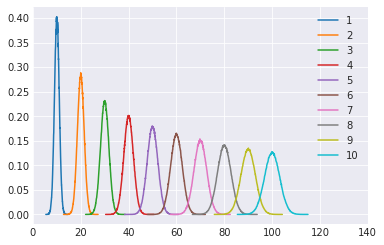

In [13]:
for sample_size in range(1,11):
    plt.plot(real_sum_distributions[sample_size].densities, label=sample_size)
plt.xlim(0,140)
plt.legend()

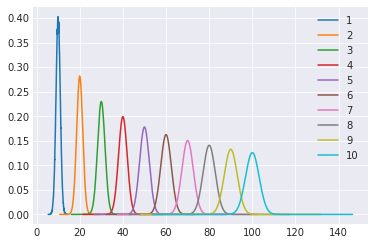

In [14]:
predicted_sum_distributions = empdist.helper_funcs.predict_distributions_independent_sums(X_distro, 10)
for region_size, distro in predicted_sum_distributions.items():
    plt.plot(distro.densities, label=region_size)
plt.legend()

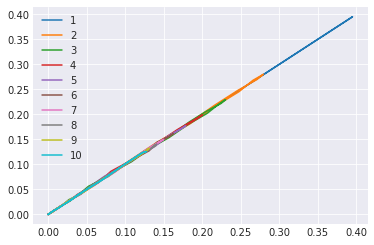

In [15]:
for sample_size in range(1,11):
    xs = numpy.linspace(*real_sum_distributions[sample_size].support)
    plt.plot(real_sum_distributions[sample_size].pdf(xs), predicted_sum_distributions[sample_size].pdf(xs), label=sample_size)
plt.legend()

### Means

In [16]:
real_means = {sample_size:real_sums[sample_size] / sample_size for sample_size in real_sums}    

In [17]:
%%time
real_mean_distributions = {sample_size:EmpiricalDistribution.from_data(real_means[sample_size]) for sample_size in real_means}

CPU times: user 1min 50s, sys: 2.43 s, total: 1min 52s
Wall time: 50.2 s


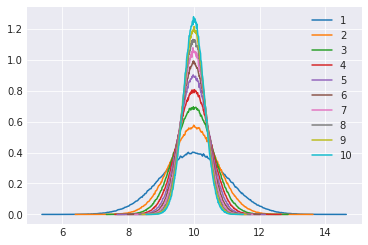

In [18]:
for sample_size in range(1,11):
    plt.plot(real_mean_distributions[sample_size].densities, label=sample_size)
# plt.xlim(0,140)
plt.legend()

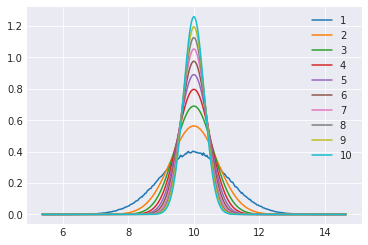

In [23]:
predicted_mean_distributions = empdist.helper_funcs.predict_distributions_indepdendent_means(X_distro, 10)
for region_size, distro in predicted_mean_distributions.items():
    plt.plot(distro.densities, label=region_size)
plt.legend()

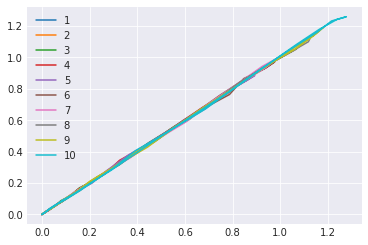

In [24]:
for sample_size in range(1,11):
    xs = numpy.linspace(*real_mean_distributions[sample_size].support)
    plt.plot(real_mean_distributions[sample_size].pdf(xs), predicted_mean_distributions[sample_size].pdf(xs), label=sample_size)
plt.legend()

In [25]:
%%time
numpy.random.seed(1)
X = scipy.stats.norm(10).rvs(n)
X_distro = EmpiricalDistribution.from_data(X)

real_mins = {1:X}
for sample_size in range(2, 11):
    real_mins[sample_size] = numpy.minimum(real_mins[sample_size-1], scipy.stats.norm(10).rvs(n))

CPU times: user 15.7 s, sys: 494 ms, total: 16.2 s
Wall time: 5.52 s


In [26]:
%%time
real_min_distributions = {sample_size:EmpiricalDistribution.from_data(real_mins[sample_size]) for sample_size in real_mins}

CPU times: user 1min 49s, sys: 2.4 s, total: 1min 51s
Wall time: 50.2 s


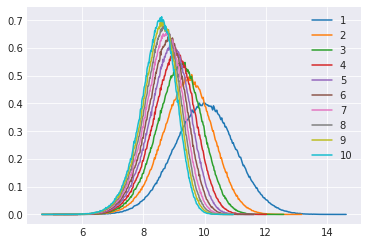

In [27]:
for sample_size in range(1,11):
    plt.plot(real_min_distributions[sample_size].densities, label=sample_size)
plt.legend()

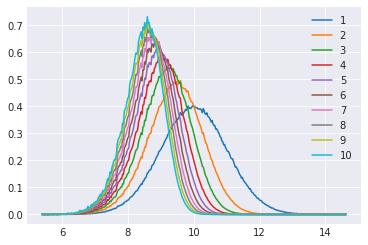

In [28]:
predicted_min_distributions = empdist.helper_funcs.predict_distributions_independent_mins(X_distro, 10)
for region_size, distro in predicted_min_distributions.items():
    plt.plot(distro.densities, label=region_size)
plt.legend()

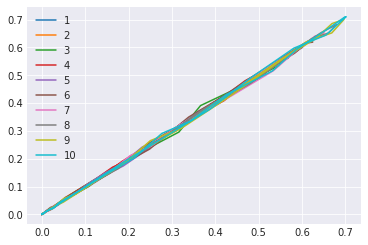

In [29]:
for sample_size in range(1,11):
    xs = numpy.linspace(*real_min_distributions[sample_size].support)
    plt.plot(real_min_distributions[sample_size].pdf(xs), predicted_min_distributions[sample_size].pdf(xs), label=sample_size)
plt.legend()

### Max

In [31]:
%%time
numpy.random.seed(1)
X = scipy.stats.norm(10).rvs(n)
X_distro = EmpiricalDistribution.from_data(X)

real_maxes = {1:X}
for sample_size in range(2, 11):
    real_maxes[sample_size] = numpy.maximum(real_maxes[sample_size-1], scipy.stats.norm(10).rvs(n))

CPU times: user 15.8 s, sys: 385 ms, total: 16.1 s
Wall time: 5.45 s


In [32]:
%%time
real_max_distributions = {sample_size:EmpiricalDistribution.from_data(real_maxes[sample_size]) for sample_size in real_maxes}

CPU times: user 1min 48s, sys: 2.13 s, total: 1min 50s
Wall time: 49.8 s


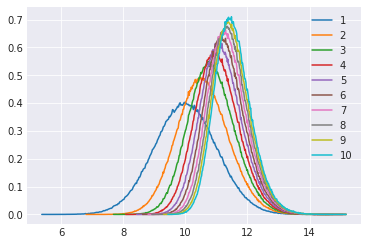

In [33]:
for sample_size in range(1,11):
    plt.plot(real_max_distributions[sample_size].densities, label=sample_size)
plt.legend()

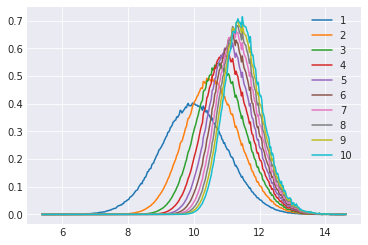

In [34]:
predicted_max_distributions = empdist.helper_funcs.predict_distributions_independent_maxes(X_distro, 10)
for region_size, distro in predicted_max_distributions.items():
    plt.plot(distro.densities, label=region_size)
    
plt.legend()

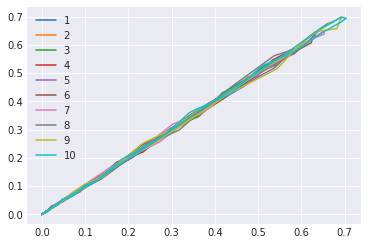

In [35]:
for sample_size in range(1,11):
    xs = numpy.linspace(*real_max_distributions[sample_size].support)
    plt.plot(real_max_distributions[sample_size].pdf(xs), predicted_max_distributions[sample_size].pdf(xs), label=sample_size)
plt.legend()